In [1]:
!pip install pandas numpy matplotlib seaborn plotly prophet

In [9]:
import pandas as pd

df = pd.read_csv("/content/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [12]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%d/%m/%Y")
df['Month'] = df['invoice_date'].dt.to_period('M').astype(str)


In [14]:
df['total_amount'] = df['price'] * df['quantity']
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Month,total_amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022-08,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021-12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021-11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021-05,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021-10,242.40


In [15]:
monthly_sales = df.groupby('Month')['total_amount'].sum().reset_index()
monthly_sales


,Month,total_amount
0,2021-01,9641614.62
1,2021-02,8772315.22
2,2021-03,9455359.38
3,2021-04,9389541.54
4,2021-05,9771756.97
5,2021-06,9286271.35
6,2021-07,10311119.68
7,2021-08,9630655.70
8,2021-09,9188165.62
9,2021-10,10263015.06


In [16]:
category_sales = df.groupby('category')['total_amount'].sum().reset_index()
category_sales


,category,total_amount
0,Books,8.345529e+05
1,Clothing,1.139968e+08
2,Cosmetics,6.792863e+06
3,Food & Beverage,8.495351e+05
4,Shoes,6.655345e+07
5,Souvenir,6.358247e+05
6,Technology,5.786235e+07
7,Toys,3.980426e+06


In [17]:
gender_sales = df.groupby('gender')['total_amount'].sum().reset_index()
gender_sales


,gender,total_amount
0,Female,1.502071e+08
1,Male,1.012987e+08


In [18]:
payment_sales = df.groupby('payment_method')['total_amount'].sum().reset_index()
payment_sales


,payment_method,total_amount
0,Cash,1.128322e+08
1,Credit Card,8.807712e+07
2,Debit Card,5.059643e+07


In [19]:
mall_sales = df.groupby('shopping_mall')['total_amount'].sum().reset_index()
mall_sales


,shopping_mall,total_amount
0,Cevahir AVM,12645138.20
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24
3,Istinye Park,24618827.68
4,Kanyon,50554231.10
5,Mall of Istanbul,50872481.68
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
8,Viaport Outlet,12521339.72
9,Zorlu Center,12901053.82


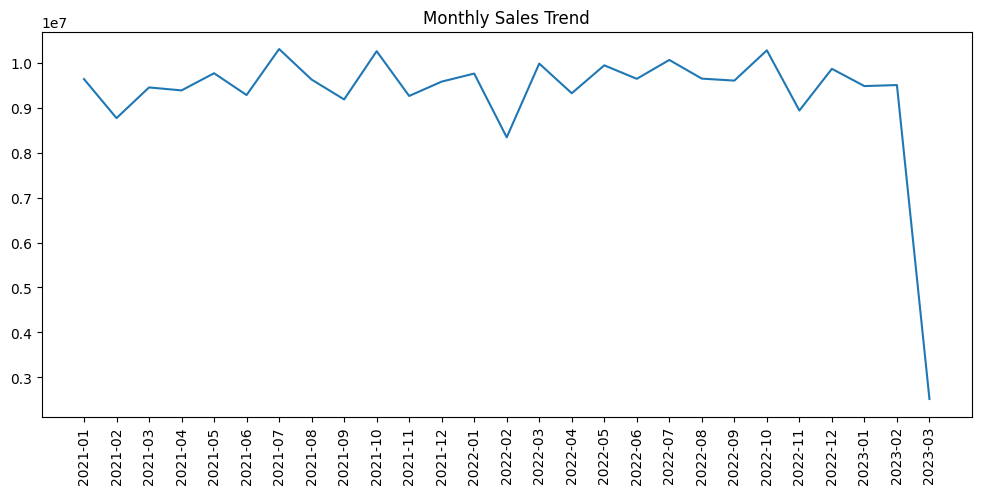

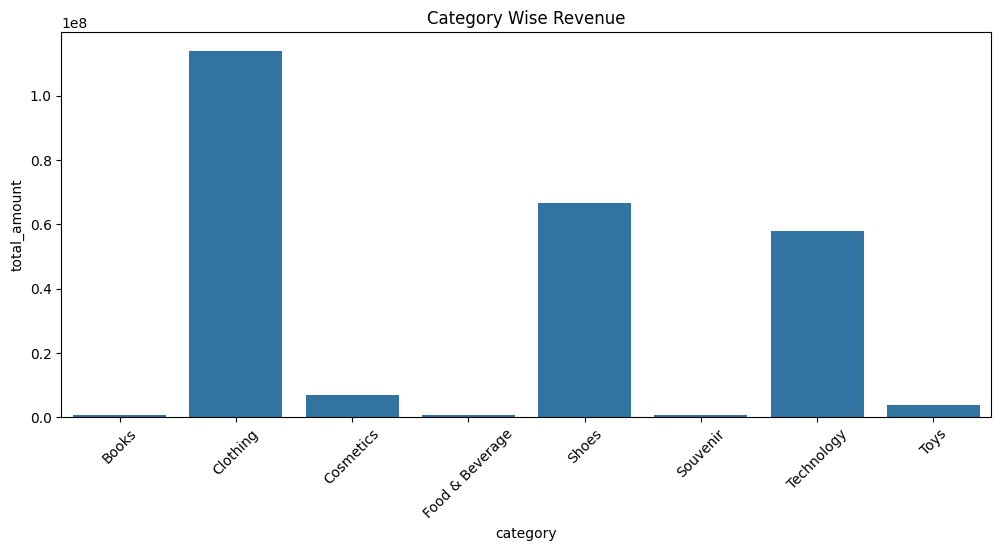

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month'], monthly_sales['total_amount'])
plt.title("Monthly Sales Trend")
plt.xticks(rotation=90)
plt.show()


import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(x='category', y='total_amount', data=category_sales)
plt.xticks(rotation=45)
plt.title("Category Wise Revenue")
plt.show()


In [23]:
monthly_sales.to_csv("monthly_sales.csv", index=False)
category_sales.to_csv("category_sales.csv", index=False)
gender_sales.to_csv("gender_sales.csv", index=False)
payment_sales.to_csv("payment_sales.csv", index=False)
mall_sales.to_csv("mall_sales.csv", index=False)

In [24]:
from google.colab import files

files.download('monthly_sales.csv')
files.download('category_sales.csv')
files.download('gender_sales.csv')
files.download('payment_sales.csv')
files.download('mall_sales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>